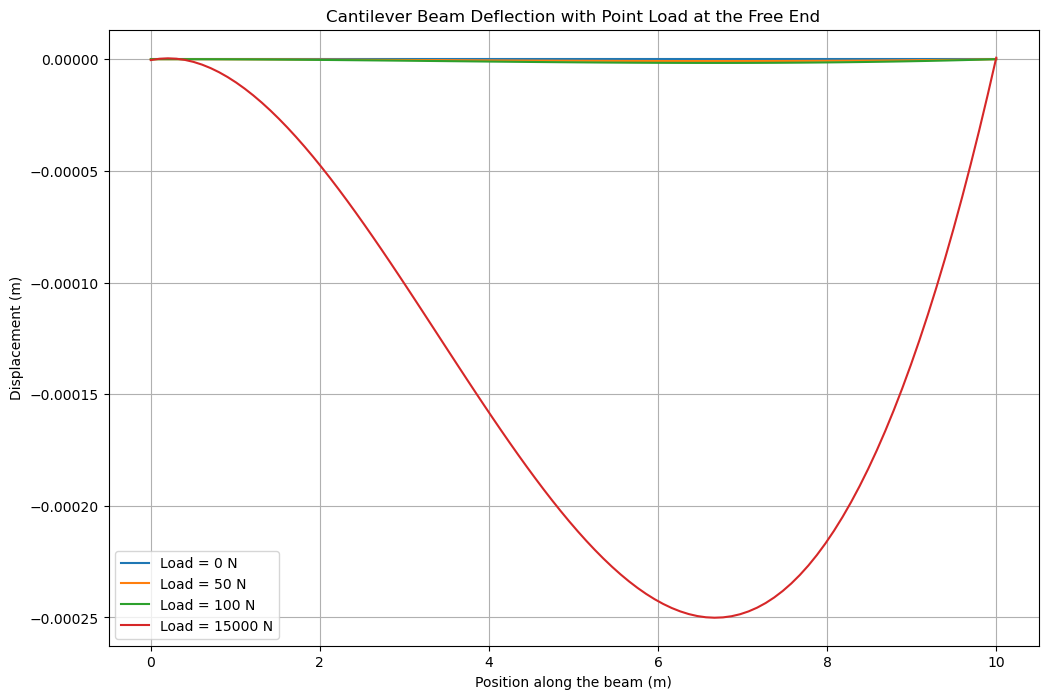

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags, identity
from scipy.sparse.linalg import spsolve

def construct_A_matrix(n, delta_x):
    diagonal = np.zeros(n)
    off_diagonal1 = np.zeros(n-1)
    off_diagonal2 = np.zeros(n-2)
    

    diagonal[2:-2] = 6
    diagonal[1] = diagonal[-2] = 7  
    diagonal[0] = diagonal[-1] = 1

    off_diagonal1[2:-2] = -4
    off_diagonal1[1] = off_diagonal1[-2] = -4 
    off_diagonal2[:] = 1


    A = diags(
        [off_diagonal2, off_diagonal1, diagonal, off_diagonal1, off_diagonal2],
        offsets=[-2, -1, 0, 1, 2],
        shape=(n, n),
        format='csc'
    )
    
    A *= EI / (delta_x ** 4)
    
    return A

def g_function(x, t, g_value, L, delta_x):
    return g_value if x >= L - delta_x else 0

    
def trapezoid_step(u_k, A, I, EI, mu, delta_t, delta_x, x_values, t_k, g_value, L):
    n = len(x_values)
    g_k = np.array([g_function(x, t_k, g_value, L, delta_x) for x in x_values])
    g_k1 = np.array([g_function(x, t_k + delta_t, g_value, L, delta_x) for x in x_values])
    
    first_term = I - (1/2) * delta_t * (EI/mu) * A
    second_term = u_k + (delta_t/2) * ((EI/mu) * (A @ u_k) + g_k + g_k1)
    
    u_k1 = spsolve(first_term, second_term)
    
    return u_k1

n = 100 
L = 10.0  # Length of the beam in meters
EI = 1.0e2  # Flexural rigidity in N*m^2
mu = 0.1  # Mass per unit length in kg/m
delta_x = L / (n - 1)  
delta_t = 0.01  
x_values = np.linspace(0, L, n)  
I = identity(n, format='csc') 

load_values = [0, 50, 100, 15000]  # in N

plt.figure(figsize=(12, 8))

A = construct_A_matrix(n, delta_x)

for load in load_values:
    u_k = np.zeros(n)
    u_k1 = trapezoid_step(u_k, A, I, EI, mu, delta_t, delta_x, x_values, 0, load, L)
    

    plt.plot(x_values, u_k1, label=f'Load = {load} N')

    # if load != 0:
    #     plt.arrow(L, 0, 0, u_k1[-1], head_width=0.2, head_length=0.1, fc='red', ec='red')

plt.title('Cantilever Beam Deflection with Point Load at the Free End')
plt.xlabel('Position along the beam (m)')
plt.ylabel('Displacement (m)')
plt.legend()
plt.grid(True)
plt.show()